In [1]:
import matplotlib.pyplot as plt

import pandas as pd
import seaborn as sns


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import average_precision_score, classification_report



In [2]:
df = pd.read_csv('/kaggle/input/fraud-transaction-detection/Final Transactions.csv')

### **Displaying first 20 rows**

In [3]:
df.head(20)

,Unnamed: 0,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENARIO
0,0,0,2023-01-01 00:00:31,596,3156,533.07,31,0,0,0
1,1,1,2023-01-01 00:02:10,4961,3412,808.56,130,0,0,0
2,2,2,2023-01-01 00:07:56,2,1365,1442.94,476,0,1,1
3,3,3,2023-01-01 00:09:29,4128,8737,620.65,569,0,0,0
4,4,4,2023-01-01 00:10:34,927,9906,490.66,634,0,0,0
5,5,5,2023-01-01 00:10:45,568,8803,401.17,645,0,0,0
6,6,6,2023-01-01 00:11:30,2803,5490,938.54,690,0,0,0
7,7,7,2023-01-01 00:11:44,4684,2486,206.53,704,0,0,0
8,8,8,2023-01-01 00:11:53,4128,8354,253.47,713,0,0,0
9,9,9,2023-01-01 00:13:44,541,6212,555.63,824,0,0,0


### **Displaying all column information**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1754155 entries, 0 to 1754154
Data columns (total 10 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Unnamed: 0         int64  
 1   TRANSACTION_ID     int64  
 2   TX_DATETIME        object 
 3   CUSTOMER_ID        int64  
 4   TERMINAL_ID        int64  
 5   TX_AMOUNT          float64
 6   TX_TIME_SECONDS    int64  
 7   TX_TIME_DAYS       int64  
 8   TX_FRAUD           int64  
 9   TX_FRAUD_SCENARIO  int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 133.8+ MB


### **Checking if any fields are empty, and require data cleaning**

In [5]:
df.isna().sum()

Unnamed: 0           0
TRANSACTION_ID       0
TX_DATETIME          0
CUSTOMER_ID          0
TERMINAL_ID          0
TX_AMOUNT            0
TX_TIME_SECONDS      0
TX_TIME_DAYS         0
TX_FRAUD             0
TX_FRAUD_SCENARIO    0
dtype: int64

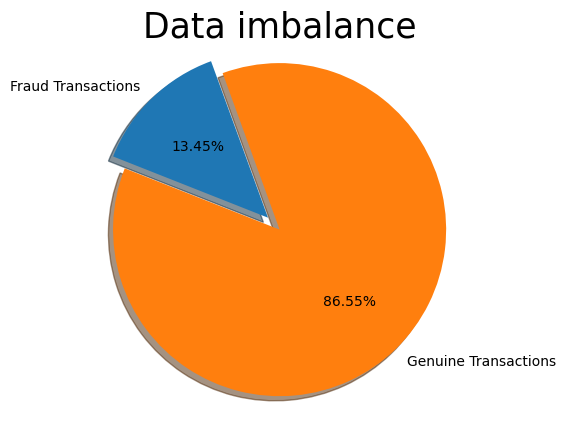

In [6]:
# count1 = df.loc[df.TX_FRAUD == 1, 'TX_FRAUD'].count()
# count0 = df.loc[df.TX_FRAUD == 0, 'TX_FRAUD'].count()

count1 = len(df[df['TX_FRAUD'] == 1])
count0 = len(df[df['TX_FRAUD'] == 0])

count1 = (count1/len(df['TX_FRAUD']))*100
count0 = (count0/len(df['TX_FRAUD']))*100

x = ['Fraud Transactions','Genuine Transactions']
y = [count1, count0]


explode = (0.1, 0)  # only "explode" the 1st slice

fig1, ax1 = plt.subplots()
ax1.pie(y, explode=explode, labels=x, autopct='%1.2f%%',
        shadow=True, startangle=110)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Data imbalance',fontsize=25)
plt.show()

In [7]:
import plotly.express as px

# df = pd.read_csv("/kaggle/input/fraud-transaction-detection/Final Transactions.csv")

df["month"] = pd.DatetimeIndex(df["TX_DATETIME"]).month

grouped = df.groupby(["month", "TX_FRAUD"]).size().reset_index(name="count")

fig = px.bar(grouped, x="month", y="count", color="TX_FRAUD", barmode="group",
             labels={"month": "Month", "count": "Number of Transactions", "TX_FRAUD": "Transaction Type"})

fig.show()

In [8]:
df = pd.read_csv("/kaggle/input/fraud-transaction-detection/Final Transactions.csv")
df = df[(df['TX_FRAUD_SCENARIO'] != 0) & (df['TX_AMOUNT'] != 0)]
grouped = df.groupby("TX_FRAUD_SCENARIO").size().reset_index(name="count")

fig = px.bar(grouped, x="TX_FRAUD_SCENARIO", y="count", color="TX_FRAUD_SCENARIO",
             labels={"TX_FRAUD_SCENARIO": "Fraud Scenario", "count": "Number of Transactions"})

fig.show()

In [9]:
df = pd.read_csv('/kaggle/input/fraud-transaction-detection/Final Transactions.csv')

df = df.drop(df.index[0])

fraud = df[df['TX_FRAUD'] == 1]

non_fraud = df[df['TX_FRAUD'] == 0]

n_non_fraud = len(non_fraud)

fraud_upsampled = fraud.sample(n_non_fraud, replace=True)

df_upsampled = pd.concat([fraud_upsampled, non_fraud])

df = df_upsampled.sample(frac=1, random_state=42).reset_index(drop=True)

df.to_csv('upsampled_transactions.csv', index=False)

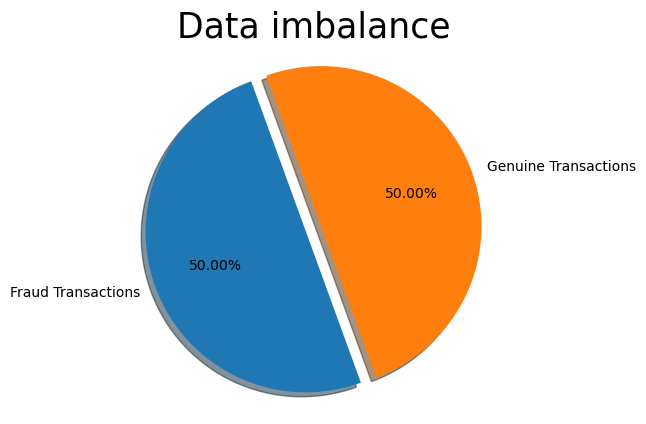

In [10]:
# df = df_upsampled

# count1 = df.loc[df.TX_FRAUD == 1, 'TX_FRAUD'].count()
# count0 = df.loc[df.TX_FRAUD == 0, 'TX_FRAUD'].count()

count1 = len(df[df['TX_FRAUD'] == 1])
count0 = len(df[df['TX_FRAUD'] == 0])

count1 = (count1/len(df['TX_FRAUD']))*100
count0 = (count0/len(df['TX_FRAUD']))*100

x = ['Fraud Transactions','Genuine Transactions']
y = [count1, count0]


explode = (0.1, 0)  # only "explode" the 1st slice

fig1, ax1 = plt.subplots()
ax1.pie(y, explode=explode, labels=x, autopct='%1.2f%%',
        shadow=True, startangle=110)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Data imbalance',fontsize=25)
plt.show()

In [11]:
# df = pd.read_csv('/kaggle/working/upsampled_transactions.csv')

df_features = df.drop(['TRANSACTION_ID', 'TX_FRAUD','TX_DATETIME','Unnamed: 0','CUSTOMER_ID','TERMINAL_ID','TX_FRAUD_SCENARIO'], axis=1)

print(df_features.head())

   TX_AMOUNT  TX_TIME_SECONDS  TX_TIME_DAYS
0     619.72         11867589           137
1     613.22          3542397            40
2     244.61           758284             8
3    1375.30         11730659           135
4    1297.98          6369893            73


In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

standardized_features = scaler.fit_transform(df_features)

In [13]:
df = pd.read_csv("/kaggle/working/upsampled_transactions.csv")
X = standardized_features
y = df["TX_FRAUD"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# **Running 4 models with standard hyperparameters**
### Models:
### 1. Random Forest
### 2. K-Nearest Neighbors
### 3. Decision Tree
### 4. Logistic Regression

In [14]:
models = {
    "Random Forest": RandomForestClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Logistic Regression": LogisticRegression()
}

for name, model in models.items():
    print(f"Model Being trained now: {name}")
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    
    print(f"{name}. Testing accuracy: {acc:.3f}")
    
    print(f"Finished Training: {name} \n\n ------------ \n\n")

Model Being trained now: Random Forest
Random Forest. Validation accuracy: 1.000
Finished Training: Random Forest 

 ------------ 


Model Being trained now: K-Nearest Neighbors
K-Nearest Neighbors. Validation accuracy: 0.989
Finished Training: K-Nearest Neighbors 

 ------------ 


Model Being trained now: Decision Tree
Decision Tree. Validation accuracy: 0.996
Finished Training: Decision Tree 

 ------------ 


Model Being trained now: Logistic Regression
Logistic Regression. Validation accuracy: 0.953
Finished Training: Logistic Regression 

 ------------ 




## Out of the 4 models, we are keeping Decision Trees, Random Forest, K-Nearest Neighbors; to tune hyperparameters and understand the best hyperparameters for each of these models.

# **Decision Trees**

## **Hyperparameter optimization for Decision Trees**

In [15]:
decisionTreeClassifier = DecisionTreeClassifier()

hyperparameters_grid_search_dt = {
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10]
}

grid_search_dt = GridSearchCV(decisionTreeClassifier,
                              hyperparameters_grid_search_dt,
                              cv=5,
                              scoring='f1_macro')

grid_search_dt.fit(X_test, y_test)

print("Chosen hyperparameters that give best results in decision trees: ")
print(grid_search_dt.best_params_)

Chosen hyperparameters that give best results in decision trees: 
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


## **Training Decision Trees using the above selected Hyperparameters**

In [16]:
decisionTreeClassifier = DecisionTreeClassifier(max_depth = None,
                                                min_samples_leaf=1,
                                                min_samples_split=2)
decisionTreeClassifier.fit(X_train, y_train)

decision_trees_prediction = decisionTreeClassifier.predict(X_test)
decision_trees_accuracy = accuracy_score(y_test, decision_trees_prediction)
decision_trees_confusionMatrix = confusion_matrix(y_test, decision_trees_prediction)


## **Classification Report**

In [17]:
print("Classification Report:\n", classification_report(y_test, decision_trees_prediction, target_names=['Genuine Transaction', 'Fraud Transaction']))

Classification Report:
                      precision    recall  f1-score   support

Genuine Transaction       1.00      0.99      1.00    303683
  Fraud Transaction       0.99      1.00      1.00    303591

           accuracy                           1.00    607274
          macro avg       1.00      1.00      1.00    607274
       weighted avg       1.00      1.00      1.00    607274



## **Confusion Matrix**

Text(0.5, 1.0, 'Decision Trees - Confusion Matrix')

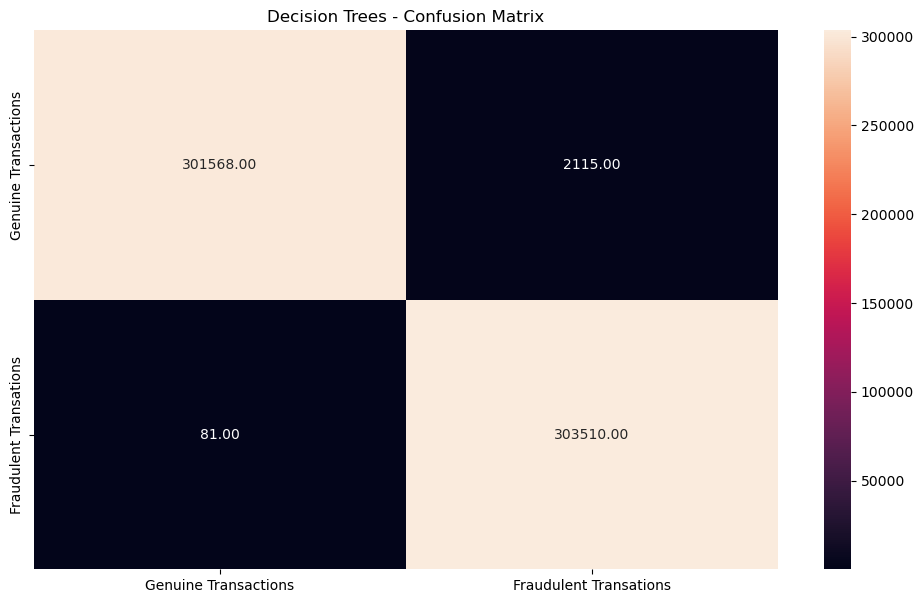

In [18]:
tx_types = ["Genuine Transactions", "Fraudulent Transations"]
df_cm_dt = pd.DataFrame(decision_trees_confusionMatrix,
                     index = [i for i in tx_types],
                     columns = [i for i in tx_types])

plt.figure(figsize = (12,7))
seaborne_conf_matrix_dt = sns.heatmap(df_cm_dt,annot=True, fmt='.2f')
seaborne_conf_matrix_dt.set_title('Decision Trees - Confusion Matrix')

# **Random Forest**


## **Hyperparameter optimization for Random Forest**

In [15]:
randomForestClassifier = RandomForestClassifier()

hyperparameters_grid_search_rf = {
    'max_depth' : [None, 5, 15],
    'criterion' :['gini', 'entropy'],
    'n_estimators': [100, 200]
}

grid_search_rf = GridSearchCV(randomForestClassifier,
                              hyperparameters_grid_search_rf,
                              cv=5,
                              scoring='f1_macro',
                              verbose=4)

grid_search_rf.fit(X_test, y_test)

print("Chosen hyperparameters that give best results in Random Forests: ")
print(grid_search_rf.best_params_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END criterion=gini, max_depth=None, n_estimators=100;, score=0.993 total time= 1.6min
[CV 2/5] END criterion=gini, max_depth=None, n_estimators=100;, score=0.993 total time= 1.7min
[CV 3/5] END criterion=gini, max_depth=None, n_estimators=100;, score=0.993 total time= 1.8min
[CV 4/5] END criterion=gini, max_depth=None, n_estimators=100;, score=0.993 total time= 1.9min
[CV 5/5] END criterion=gini, max_depth=None, n_estimators=100;, score=0.993 total time= 1.9min
[CV 1/5] END criterion=gini, max_depth=None, n_estimators=200;, score=0.993 total time= 3.8min
[CV 2/5] END criterion=gini, max_depth=None, n_estimators=200;, score=0.993 total time= 3.7min
[CV 3/5] END criterion=gini, max_depth=None, n_estimators=200;, score=0.993 total time= 3.9min
[CV 4/5] END criterion=gini, max_depth=None, n_estimators=200;, score=0.993 total time= 3.8min
[CV 5/5] END criterion=gini, max_depth=None, n_estimators=200;, score=0.993 total ti

## **Training Random Forest using the above selected Hyperparameters**

In [16]:
randomForestClassifier = RandomForestClassifier(criterion = 'gini',
                                                max_depth = None,
                                                n_estimators = 200)
randomForestClassifier.fit(X_train, y_train)

random_forests_prediction = randomForestClassifier.predict(X_test)

random_forests_accuracy = accuracy_score(y_test, random_forests_prediction)
random_forests_confusionMatrix = confusion_matrix(y_test, random_forests_prediction)

## **Classification Report**

In [17]:
print("Classification Report:\n", classification_report(y_test, random_forests_prediction, target_names=['Genuine Transaction', 'Fraudulent Transaction']))

Classification Report:
                         precision    recall  f1-score   support

   Genuine Transaction       1.00      1.00      1.00    303683
Fraudulent Transaction       1.00      1.00      1.00    303591

              accuracy                           1.00    607274
             macro avg       1.00      1.00      1.00    607274
          weighted avg       1.00      1.00      1.00    607274



## **Confusion Matrix**

Text(0.5, 1.0, 'Random Forest - Confusion Matrix')

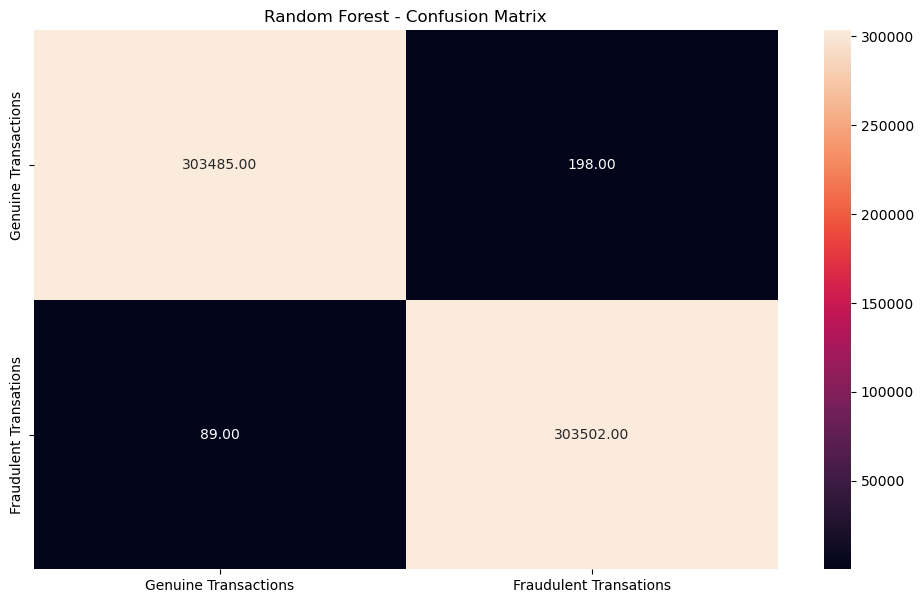

In [18]:
tx_types = ["Genuine Transactions", "Fraudulent Transations"]
df_cm_rf = pd.DataFrame(random_forests_confusionMatrix,
                     index = [i for i in tx_types],
                     columns = [i for i in tx_types])

plt.figure(figsize = (12,7))
seaborne_conf_matrix_dt = sns.heatmap(df_cm_rf,annot=True, fmt='.2f')
seaborne_conf_matrix_dt.set_title('Random Forest - Confusion Matrix')

# **K-Nearest Neighbours (kNN)**
## **Hyperparameter optimization for kNN**

In [24]:
kNearestNeighborsClassifier = KNeighborsClassifier()

hyperparameters_grid_search_kNN = {
    'n_neighbors' : [3, 5, 11, 19],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'chebyshev']
}

grid_search_kNN = GridSearchCV(kNearestNeighborsClassifier,
                              hyperparameters_grid_search_kNN,
                              cv=5,
                              scoring='f1_macro',
                              verbose=4)

grid_search_kNN.fit(X_test, y_test)

print("Chosen hyperparameters that give best results in kNN: ")
print(grid_search_kNN.best_params_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END metric=euclidean, n_neighbors=3, weights=uniform;, score=0.977 total time=   3.4s
[CV 2/5] END metric=euclidean, n_neighbors=3, weights=uniform;, score=0.978 total time=   3.3s
[CV 3/5] END metric=euclidean, n_neighbors=3, weights=uniform;, score=0.977 total time=   3.3s
[CV 4/5] END metric=euclidean, n_neighbors=3, weights=uniform;, score=0.977 total time=   3.3s
[CV 5/5] END metric=euclidean, n_neighbors=3, weights=uniform;, score=0.977 total time=   3.4s
[CV 1/5] END metric=euclidean, n_neighbors=3, weights=distance;, score=0.983 total time=   1.1s
[CV 2/5] END metric=euclidean, n_neighbors=3, weights=distance;, score=0.984 total time=   1.1s
[CV 3/5] END metric=euclidean, n_neighbors=3, weights=distance;, score=0.983 total time=   1.2s
[CV 4/5] END metric=euclidean, n_neighbors=3, weights=distance;, score=0.983 total time=   1.1s
[CV 5/5] END metric=euclidean, n_neighbors=3, weights=distance;, score=0.983 tot

## **Training kNN using the above selected Hyperparameters**

In [28]:
kNearestNeighborsClassifier = KNeighborsClassifier(metric = 'euclidean',
                                                   n_neighbors = 19,
                                                   weights = 'distance')

kNearestNeighborsClassifier.fit(X_train, y_train)

kNN_prediction = kNearestNeighborsClassifier.predict(X_test)

kNN_accuracy = accuracy_score(y_test, kNN_prediction)
kNN_confusionMatrix = confusion_matrix(y_test, kNN_prediction)

## **Classification Report**

In [29]:
print("Classification Report:\n", classification_report(y_test, kNN_prediction, target_names=['Genuine Transaction', 'Fraudulent Transaction']))

Classification Report:
                         precision    recall  f1-score   support

   Genuine Transaction       1.00      0.99      1.00    303683
Fraudulent Transaction       0.99      1.00      1.00    303591

              accuracy                           1.00    607274
             macro avg       1.00      1.00      1.00    607274
          weighted avg       1.00      1.00      1.00    607274



## **Confusion Matrix**

Text(0.5, 1.0, 'kNN - Confusion Matrix')

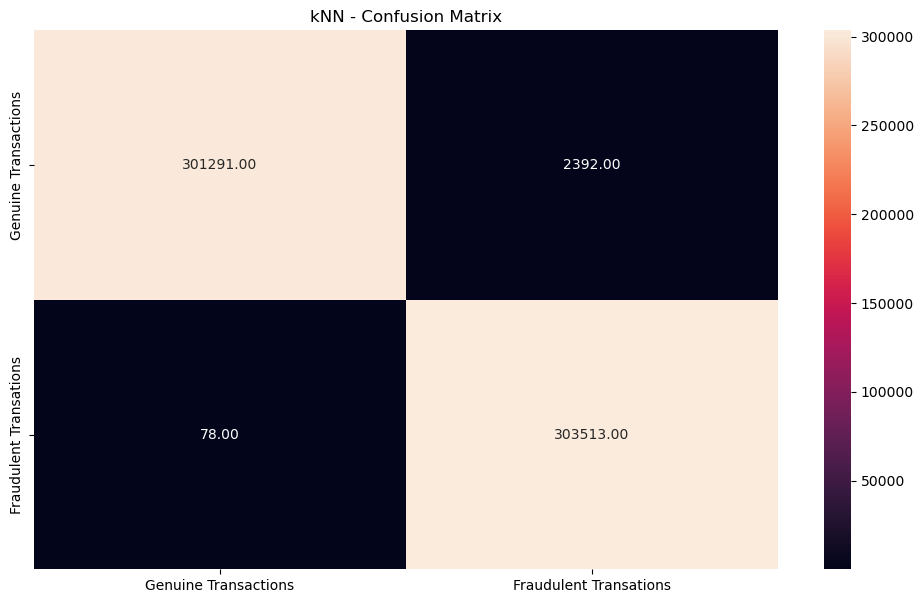

In [30]:
tx_types = ["Genuine Transactions", "Fraudulent Transations"]
df_cm_rf = pd.DataFrame(kNN_confusionMatrix,
                     index = [i for i in tx_types],
                     columns = [i for i in tx_types])

plt.figure(figsize = (12,7))
seaborne_conf_matrix_dt = sns.heatmap(df_cm_rf,annot=True, fmt='.2f')
seaborne_conf_matrix_dt.set_title('kNN - Confusion Matrix')